In [1]:
import pandas as pd
import numpy as np
import os
os.getcwd()

'c:\\Users\\Admin\\Desktop\\test\\Data-analysis\\kaggle\\playground-series-s3e11'

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [4]:
print(f'train的形状：{train.shape}')
print('')
print(f'train的缺失值数量：{train.isna().sum().sum()}')
print('')
print(f'train的缺失值列名：{train.columns[train.isna().any()].tolist()}')
print('')
print(f'train的数据类型：{set(train.dtypes)}')

train的形状：(360336, 17)

train的缺失值数量：0

train的缺失值列名：[]

train的数据类型：{dtype('int64'), dtype('float64')}


&emsp;&emsp;可以看出，train数据集没有缺失值，并且都是数字类型数据，方便我们直接调用sklearn中的方法来进行预测

In [5]:
test.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [6]:
train.drop('id',axis=1,inplace=True)

In [7]:
train.nunique()

store_sales(in millions)      1044
unit_sales(in millions)          6
total_children                   6
num_children_at_home             6
avg_cars_at home(approx).1       5
gross_weight                   384
recyclable_package               2
low_fat                          2
units_per_case                  36
store_sqft                      20
coffee_bar                       2
video_store                      2
salad_bar                        2
prepared_food                    2
florist                          2
cost                           328
dtype: int64

In [8]:
train.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


&emsp;&emsp;可以看出，train中有的变量为分类变量，先画个热力图观察一下与cost相关性较高的几个变量，顺便观察是否变量之间会存在多重共线性

<Axes: >

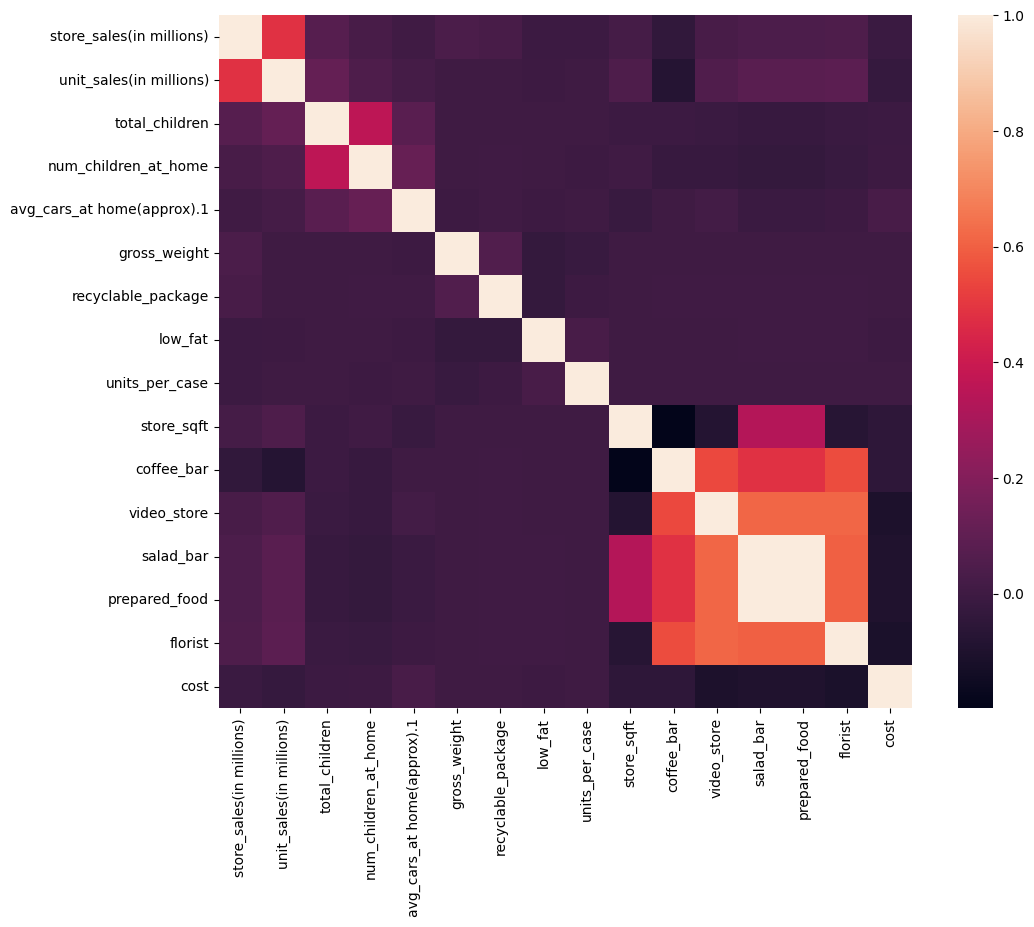

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
cor=train.corr()
sns.heatmap(cor,square=True)

&emsp;&emsp;我们可以在画一张热力图，先将数据进行标准化处理，观察两张热力图是否会发生变化

<Axes: >

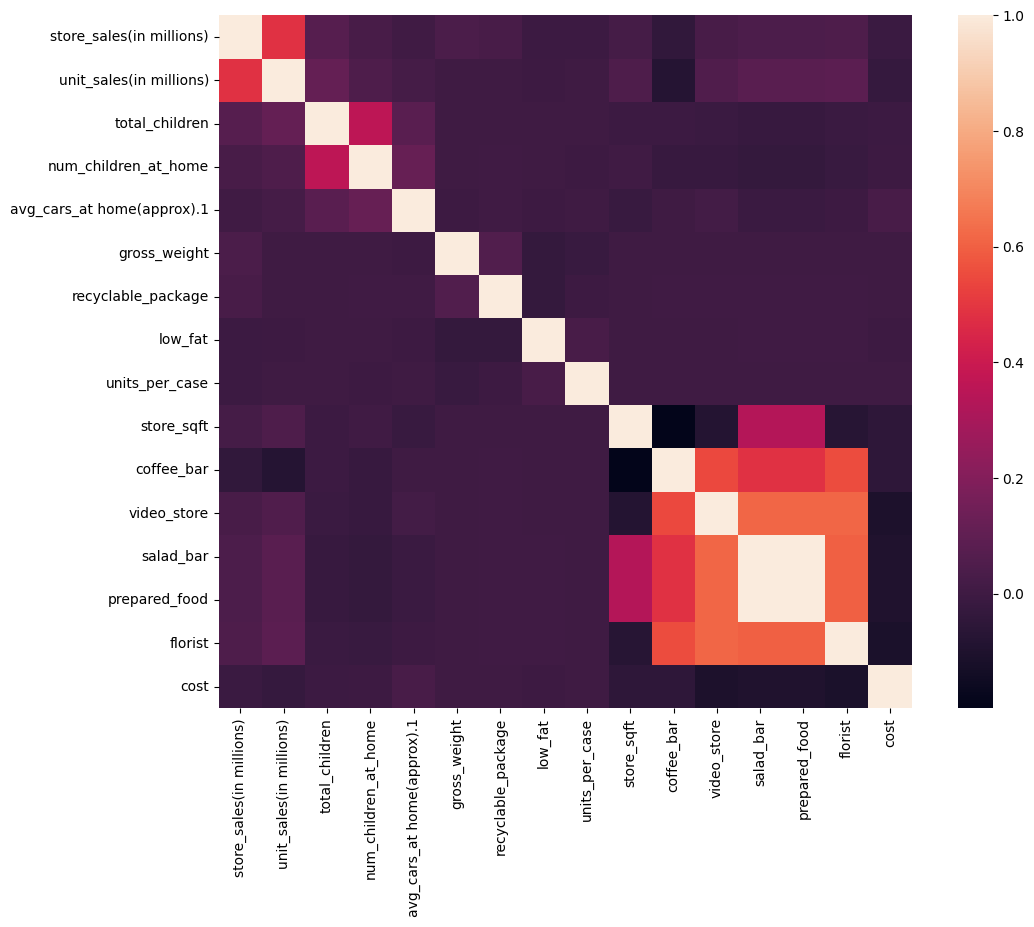

In [10]:
from sklearn.preprocessing import StandardScaler
transform=StandardScaler()
train_new=transform.fit_transform(train)
train_new=pd.DataFrame(train_new,columns=train.columns)
cor_new=train_new.corr()
plt.figure(figsize=(12,9))
sns.heatmap(data=cor_new,square=True)

&emsp;&emsp;可以看出，这个标准化之后的热力图，与之前的热力图二者完全一致。观察热力图可以发现，salad_bar与prepared_food二者相关系数为1，存在严重共线性。下面来观察着两个变量

In [11]:
sp=train[['salad_bar','prepared_food']]

In [12]:
sp['diff']=sp['salad_bar']-sp['prepared_food']

C:\Users\Admin\AppData\Local\Temp\ipykernel_20060\279636873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp['diff']=sp['salad_bar']-sp['prepared_food']


In [13]:
sp['diff'].sum()

-9.0

&emsp;&emsp;我们有理由去相信，这两个变量是完全一致的，因此我们只会选取其中一个来作为我们的解释变量，接下来我们将筛选前10个与cost相关系数较高的变量作为我们回归中的解释变量

<Axes: >

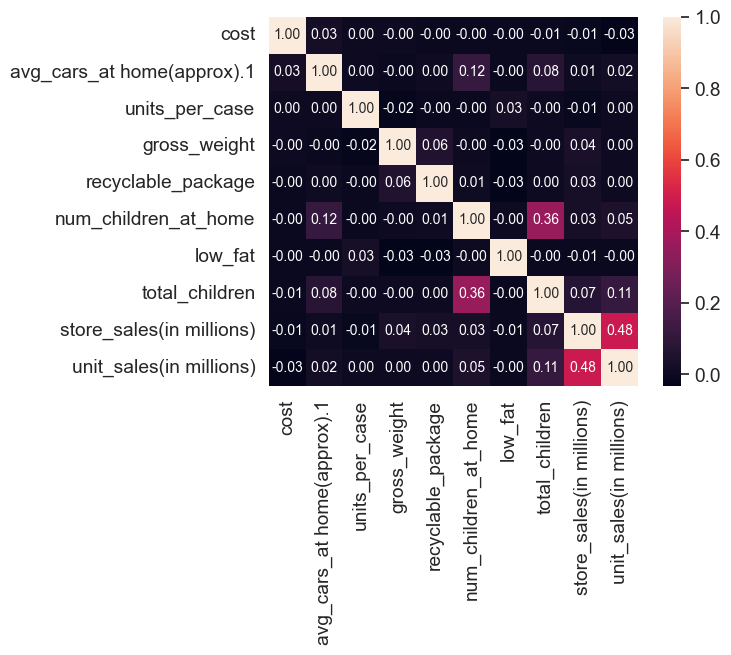

In [14]:
k=10
cols=cor.nlargest(k,'cost')['cost'].index
cm=np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

&emsp;&emsp;看起来这个不同变量与cost的相关性都不太强，我们可能需要进一步对数据进行处理